In [1]:
import os 
import sys
import glob
from tqdm import tqdm

import numpy as np 
import matplotlib.pyplot as plt 

import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.analysis import distances
from MDAnalysis.analysis.rms import rmsd, RMSD

In [2]:
ref_pdb = '../../inputs/1KBH.pdb'
pdb_files = sorted(glob.glob('../../inputs/input_0*/prot.pdb'))
traj_files = sorted(glob.glob('../../md_runs/input_00*/prod_md/mdcrd'))

In [3]:
actr_sel = 'protein and resnum 1-47' 
ncbd_sel = 'protein and resnum 48-106' 
for traj_file, pdb_file in zip(traj_files, pdb_files): 
    pdb_traj = os.path.dirname(traj_file) + '/protein.dcd'
    pdb = os.path.dirname(traj_file) + '/protein.pdb'
    mda_traj = mda.Universe(pdb_file, traj_file, format='NC')
    protein = mda_traj.select_atoms('protein') 
    ncbd_traj = mda_traj.select_atoms(ncbd_sel)
    actr_traj = mda_traj.select_atoms(actr_sel)
    protein.write(pdb)
    with mda.Writer(pdb_traj, protein.n_atoms) as W: 
        for ts in tqdm(mda_traj.trajectory): 
            box_edge = ts.dimensions[0]
            box_center = np.array([1/6, 1/6*np.sqrt(2), 1/6*np.sqrt(6)]) * box_edge
            trans_vec = box_center - np.array(ncbd_traj.center_of_mass())
            protein.atoms.translate(trans_vec).wrap()
            W.write(protein)

100%|██████████| 40000/40000 [00:54<00:00, 733.57it/s]


In [4]:
pdb_files = sorted(glob.glob('../../md_runs/input_00*/prod_md/protein.pdb'))
traj_files = sorted(glob.glob('../../md_runs/input_00*/prod_md/protein.dcd'))

In [6]:
rmsd_profs = [] 
dist_profs = [] 
ref_traj = mda.Universe(ref_pdb)
ref_ca = ref_traj.select_atoms('protein and name CA')
actr_sel = 'protein and resnum 1-47' 
ncbd_sel = 'protein and resnum 48-106' 
for traj_file, pdb_file in zip(traj_files, pdb_files): 
#     print("Loaded strcture and run RMSD ")
    mda_traj = mda.Universe(pdb_file, traj_file) 
#     print(pdb_file, traj_file)
    protein = mda_traj.select_atoms('protein')
    ncbd_traj = mda_traj.select_atoms(ncbd_sel)
    actr_traj = mda_traj.select_atoms(actr_sel)
    rmsd_inst = RMSD(mda_traj, ref_traj, select='protein and name CA', verbose=True) 
    rmsd_inst.run() 
    rmsd_profs.append(rmsd_inst.rmsd)
#     dist = []
#     for ts in tqdm(mda_traj.trajectory[:]): 
#         trans_vec = np.array(ts.dimensions[:3])/2 - np.array(ncbd_traj.center_of_mass())
# #         print(protein.center_of_mass())
#         protein.atoms.translate(trans_vec).wrap()
#         print(protein.center_of_mass())
#         pro_ca = protein.select_atoms('name CA')
#         rmsd_inst = rmsd(pro_ca.positions, ref_ca.positions, superposition=1)
#         dist_map = distances.distance_array(ncbd_traj.positions, actr_traj.positions,  box=ncbd_traj.dimensions)
#         dist.append([ts.time, np.min(dist_map)])
#         rmsd_traj.append([ts.time, rmsd_inst])
    rmsd_profs.append(rmsd_inst)
    dist_profs.append(dist)
    
rmsd_profs = np.array(rmsd_profs)
dist_profs = np.array(dist_profs)

../../md_runs/input_0000/prod_md/protein.pdb ../../md_runs/input_0000/prod_md/protein.dcd


RMSD 13.19 A at frame 40000/40000  [100.0%]
  1%|          | 251/40000 [00:14<34:42, 19.09it/s]

KeyboardInterrupt: 

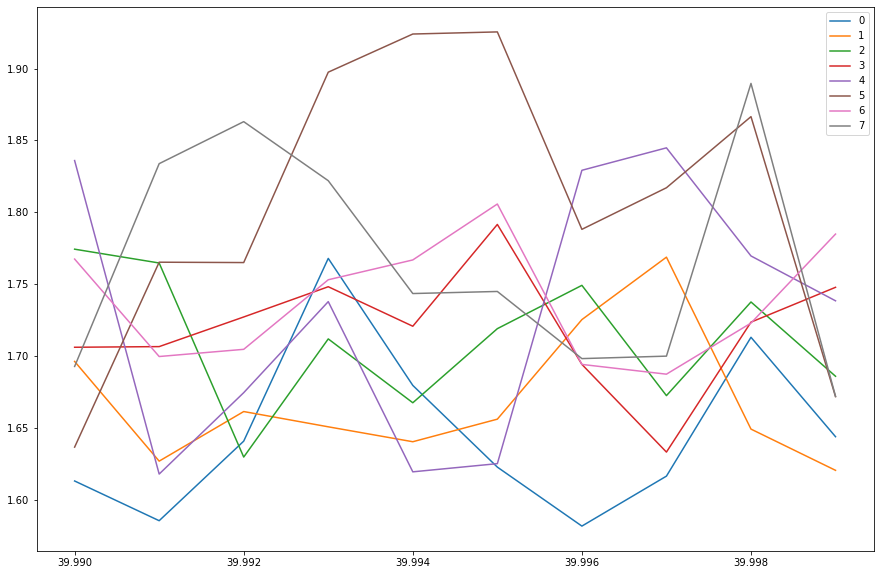

In [11]:
fig, ax = plt.subplots(figsize=(15,10)) 
n_traj = 0 

for j, dist_inst in enumerate(dist_profs): 
    ax.plot(dist_inst[:,0]/1000, dist_inst[:,1], label=j) 
plt.legend()
plt.savefig('dist.pdf')

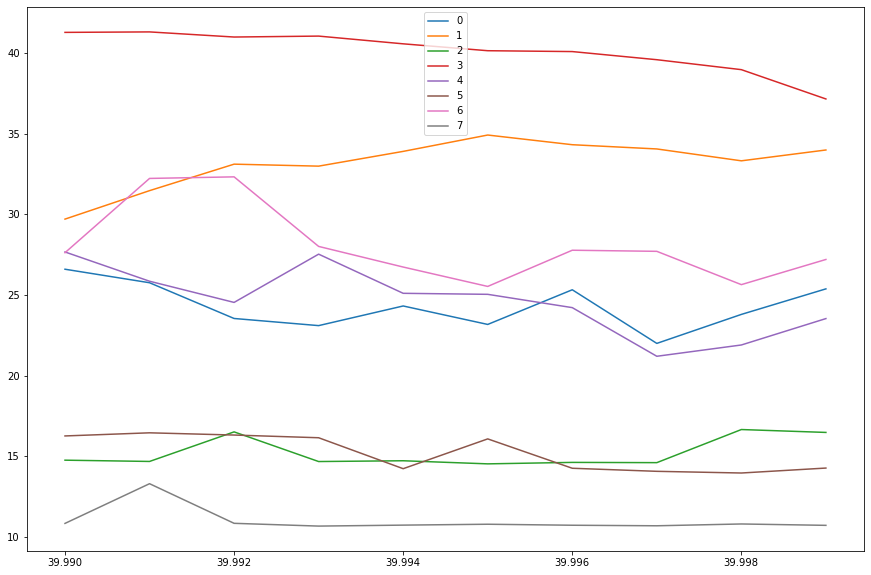

In [12]:
fig, ax = plt.subplots(figsize=(15,10)) 
n_traj = 0 

for j, rmsd_inst in enumerate(rmsd_profs): 
    ax.plot(rmsd_inst[:,0]/1000, rmsd_inst[:,1], label=j) 
plt.legend()
plt.savefig('rmsd.pdf')

AttributeError: 'numpy.ndarray' object has no attribute 'rmsd'

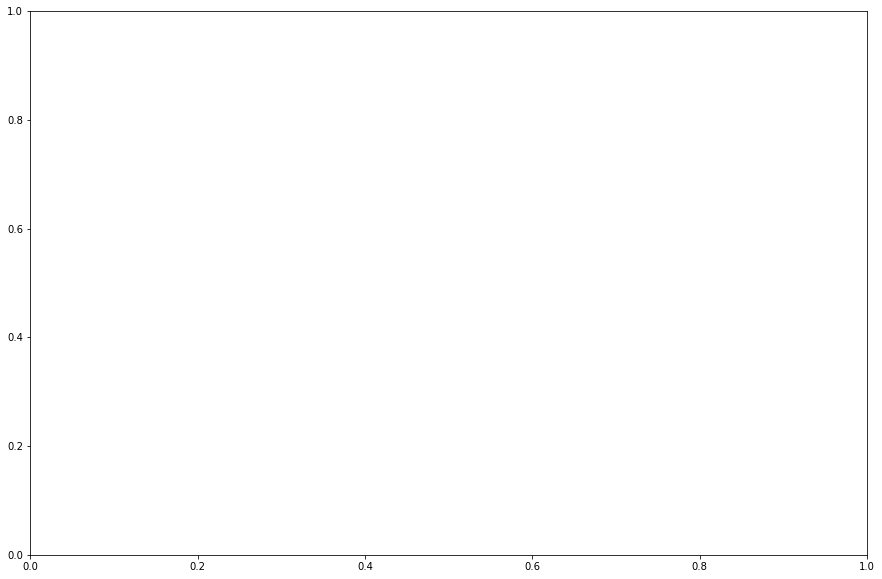

In [17]:
fig, ax = plt.subplots(figsize=(15,10)) 
n_traj = 0 

for j, rmsd_inst in enumerate(rmsd_profs): 
    ax.plot(rmsd_inst[:,1]/1000, rmsd_inst[:,2], label=j) 
plt.legend()
plt.savefig('rmsd.pdf')